In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv") #reading the file 

In [81]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [83]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [84]:
d1 = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}

In [85]:
data["species"] = data["species"].map(d1)

In [86]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

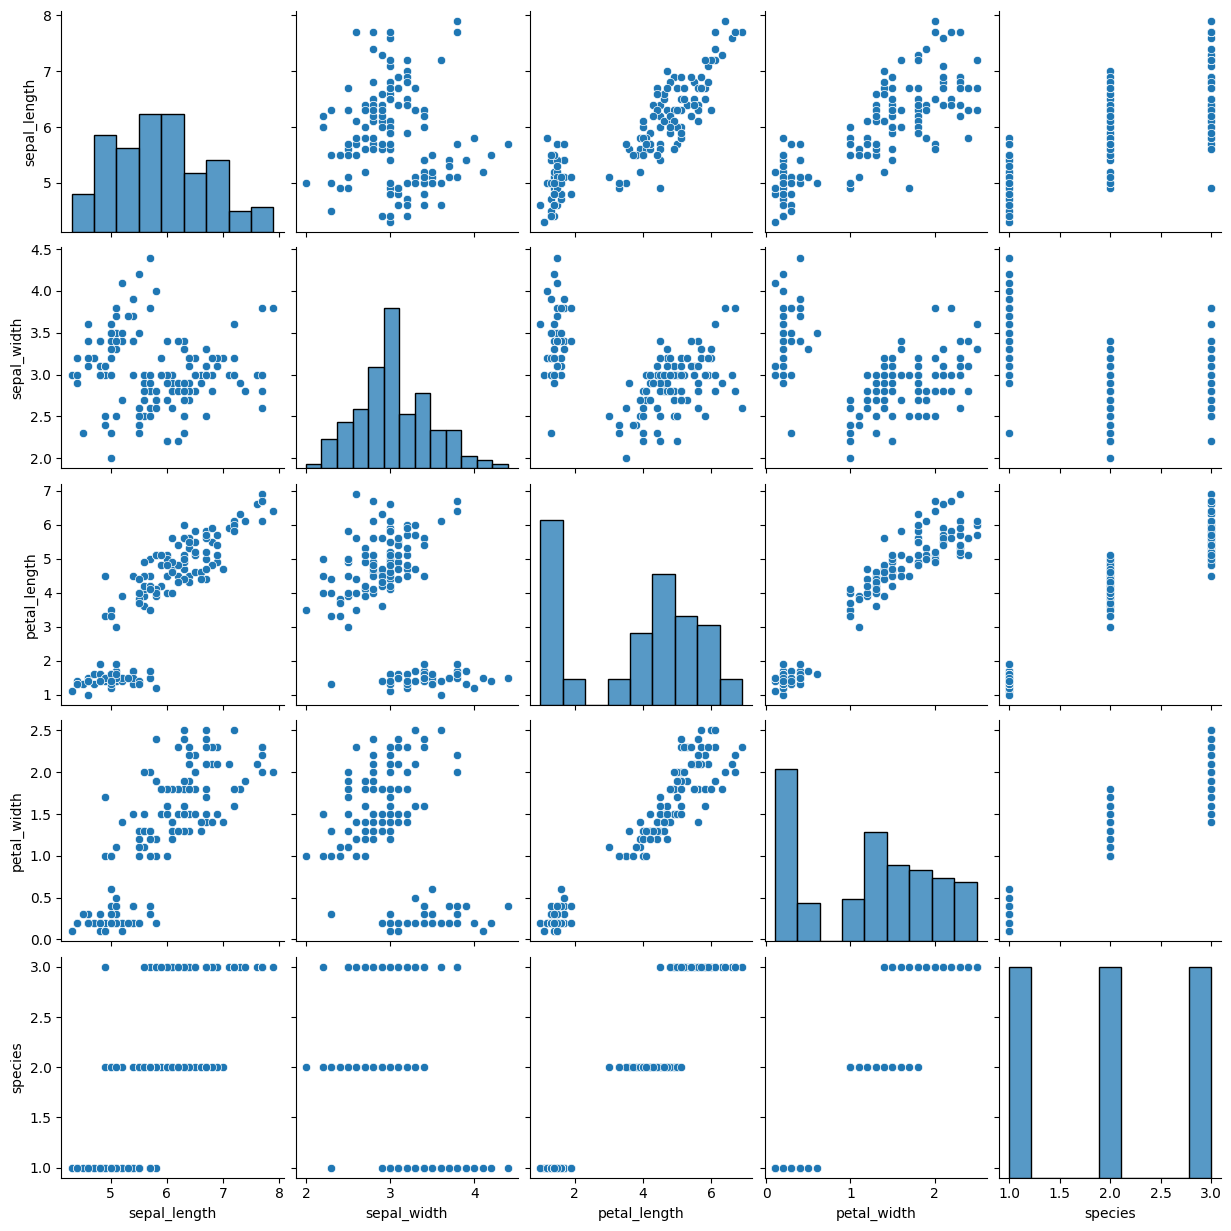

In [87]:
sns.pairplot(data)
plt.show()

In [88]:
correlation = data.corr()

In [89]:
correlation

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

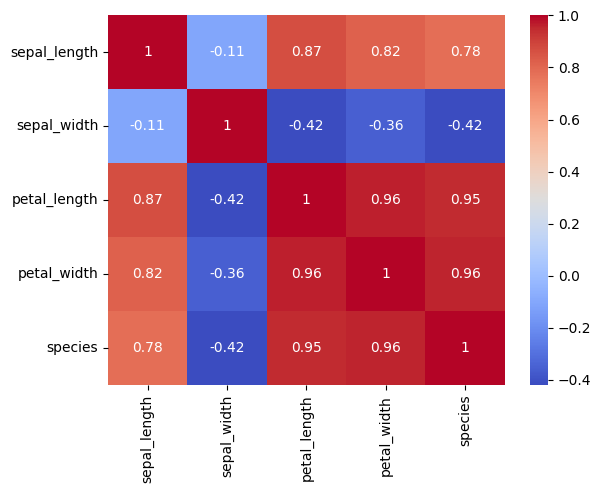

In [90]:
sns.heatmap(correlation,annot=True,cmap="coolwarm")

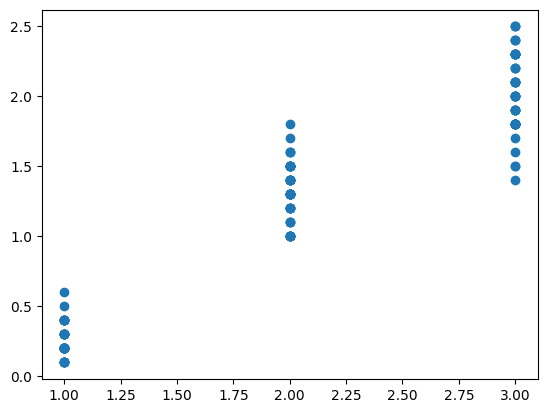

In [91]:
plt.scatter(data["species"],data["petal_width"])

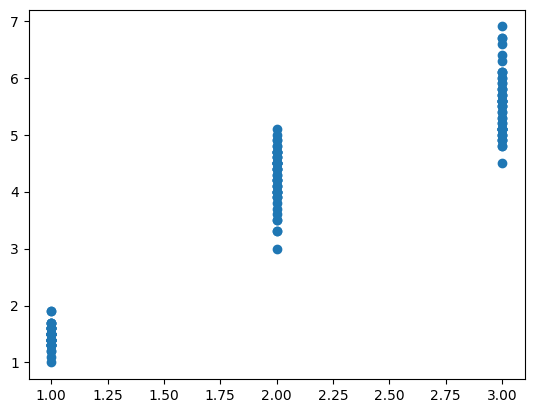

In [92]:
plt.scatter(data["species"],data["petal_length"])

In [93]:
#Extracting Independent and dependent Variable
x= data.iloc[:, :-1].values  
y= data.iloc[:, -1].values

In [94]:
from sklearn.model_selection import train_test_split #Splitting data into test and training set.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=5)

In [95]:
from sklearn.linear_model  import LogisticRegression #Fitting data in the model
regressor= LogisticRegression()  
regressor.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [98]:
y_pred = regressor.predict(x_test)

In [99]:
score = accuracy_score(y_test,y_pred)
score

0.98

In [100]:
score1 = confusion_matrix(y_test,y_pred)
score1

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 17]])

In [101]:
classReport = classification_report(y_test,y_pred)
print(classReport)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.94      0.97        17
           3       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

